<a href="https://colab.research.google.com/github/MohammedFathalla/Fine-Tuning-YoloV11-To-Detect-Tennis-balls/blob/main/Trainning_YOLO11_Object_Detection_on_Tennis_balls.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Trainning YOLO11 Object Detection on Tennis balls**


# **Create a home constant**

In [1]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLO11 via Ultralytics

In [2]:
%pip install ultralytics supervision roboflow
import ultralytics
ultralytics.checks()

Ultralytics 8.3.36 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.5/112.6 GB disk)


# **Imorting custom data from roboflow**

In [3]:
from google.colab import userdata
from roboflow import Roboflow

rf = Roboflow(api_key="nLc4LsHrpFeiKuJpYIwQ")
project = rf.workspace("project-90vvo").project("tennis-balls-51dxu-xuxez")
version = project.version(1)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to tennis-balls-1 in yolov11:: 100%|██████████| 2100/2100 [00:00<00:00, 3509.19it/s]


# **Import Toolkits**

In [4]:
from ultralytics import YOLO
import cv2
import os
import numpy as np
import itertools
import shutil
import matplotlib.pyplot as plt
import random
from IPython.display import Image , display , Video
import time
import glob
import requests

# **Show Sample Data**

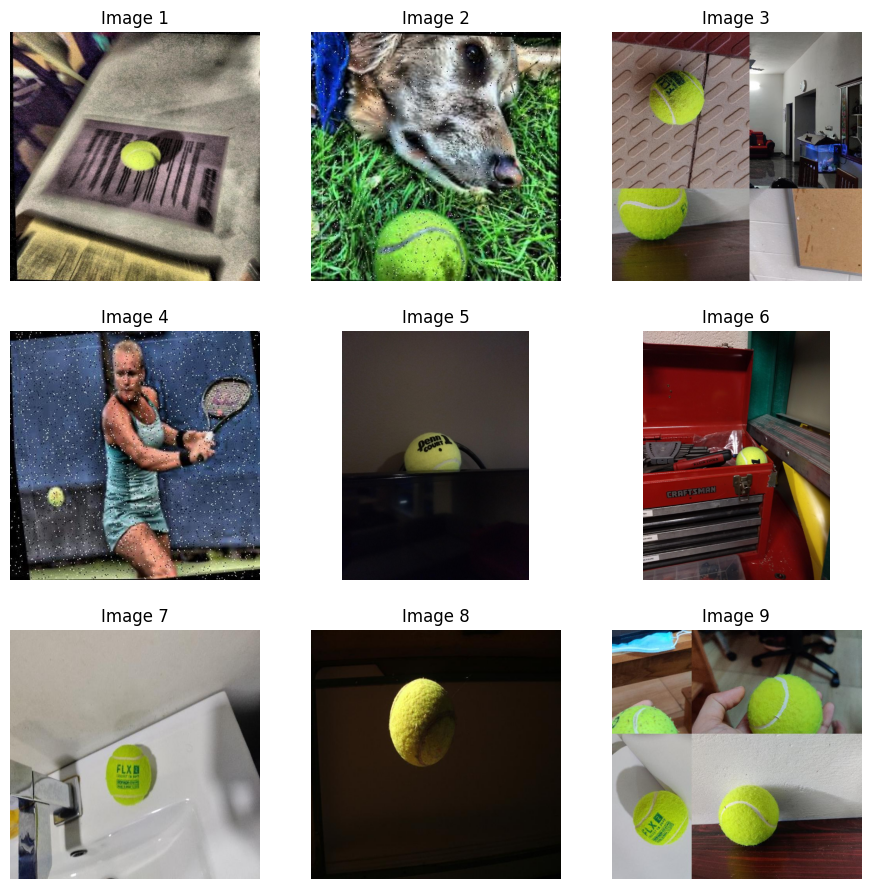

In [5]:
img_dir = "/content/tennis-balls-1/train/images"
n_samples = 9
img_files = os.listdir(img_dir)
rand_imgs = random.sample(img_files , n_samples)
fig , axes = plt.subplots(3,3, figsize=(11,11))

for i in range(n_samples):
  img = rand_imgs[i]
  ax = axes[i//3 , i%3]
  ax.imshow(plt.imread(os.path.join(img_dir ,img)))
  ax.axis('off')
  ax.set_title(f"Image {i+1}")

plt.tight_layout
plt.show();

# **Train Yolov11 On Tennis Ball Data**

In [6]:
!yolo task=detect mode=train model=yolo11s.pt data={dataset.location}/data.yaml epochs=10 batch=16 imgsz=640 plots=True

100% 18.4M/18.4M [00:00<00:00, 61.6MB/s]
Ultralytics 8.3.36 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=/content/tennis-balls-1/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=Fal

# **Model Evaluation**

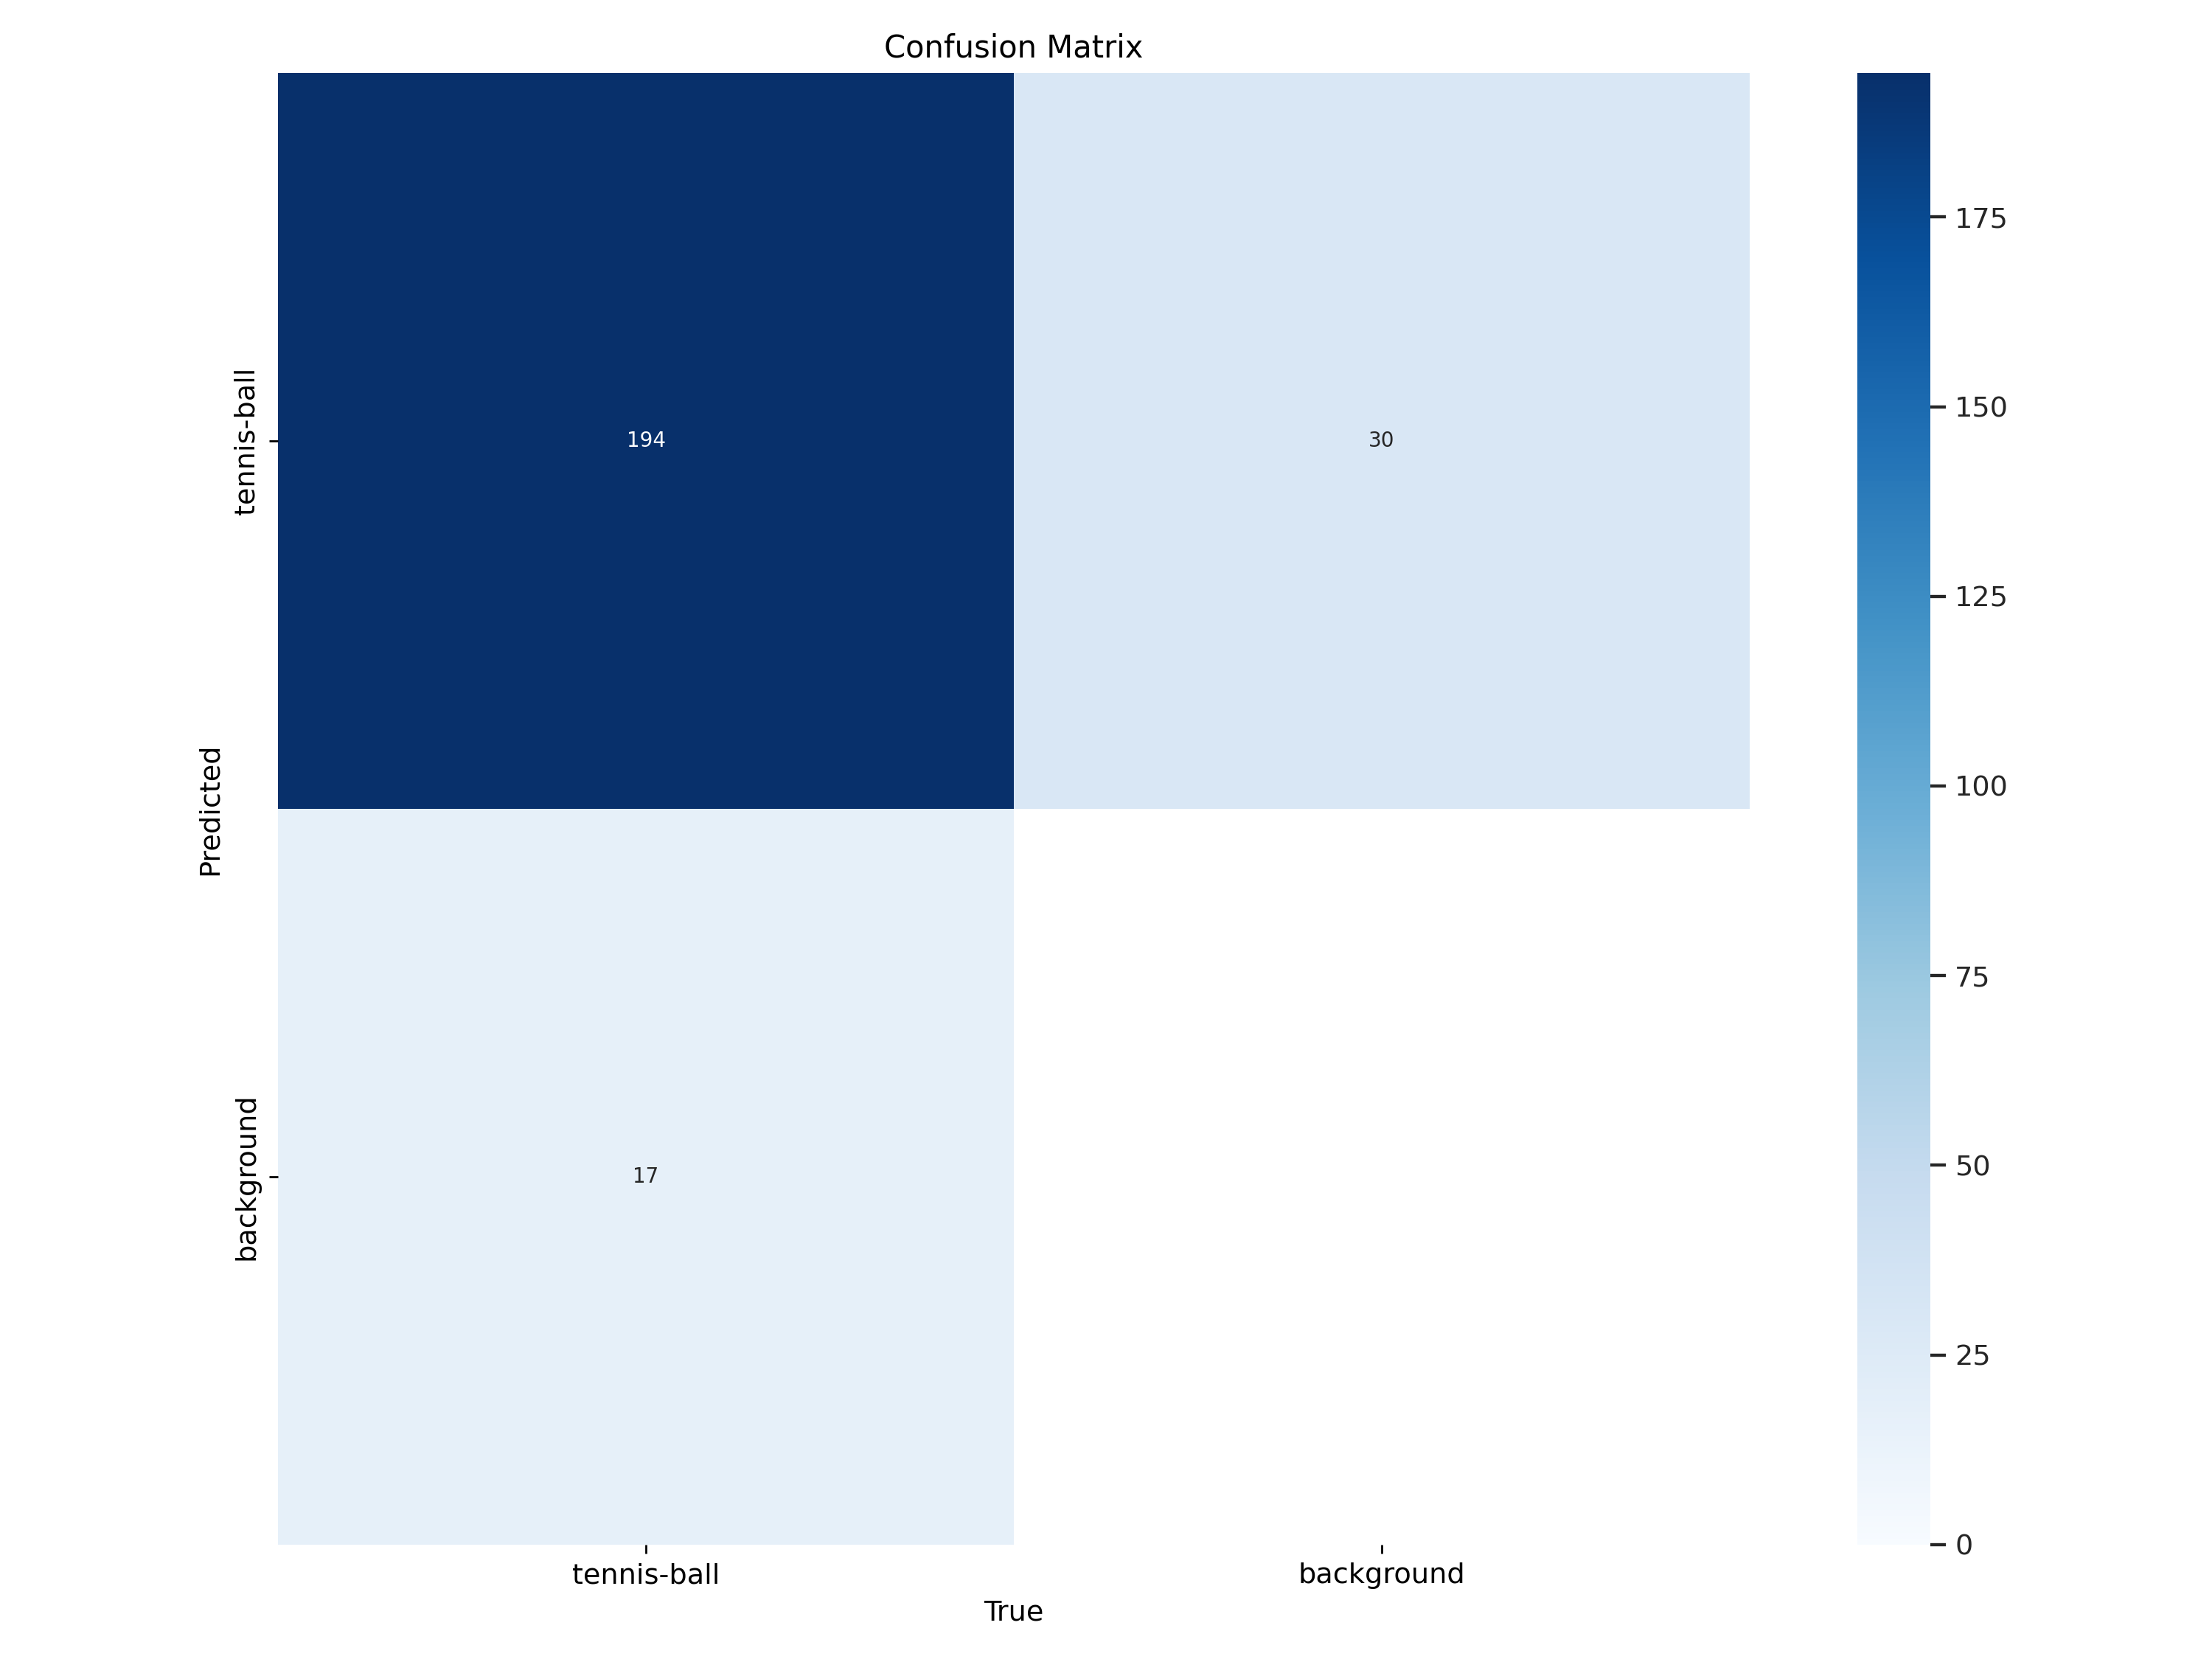

In [7]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

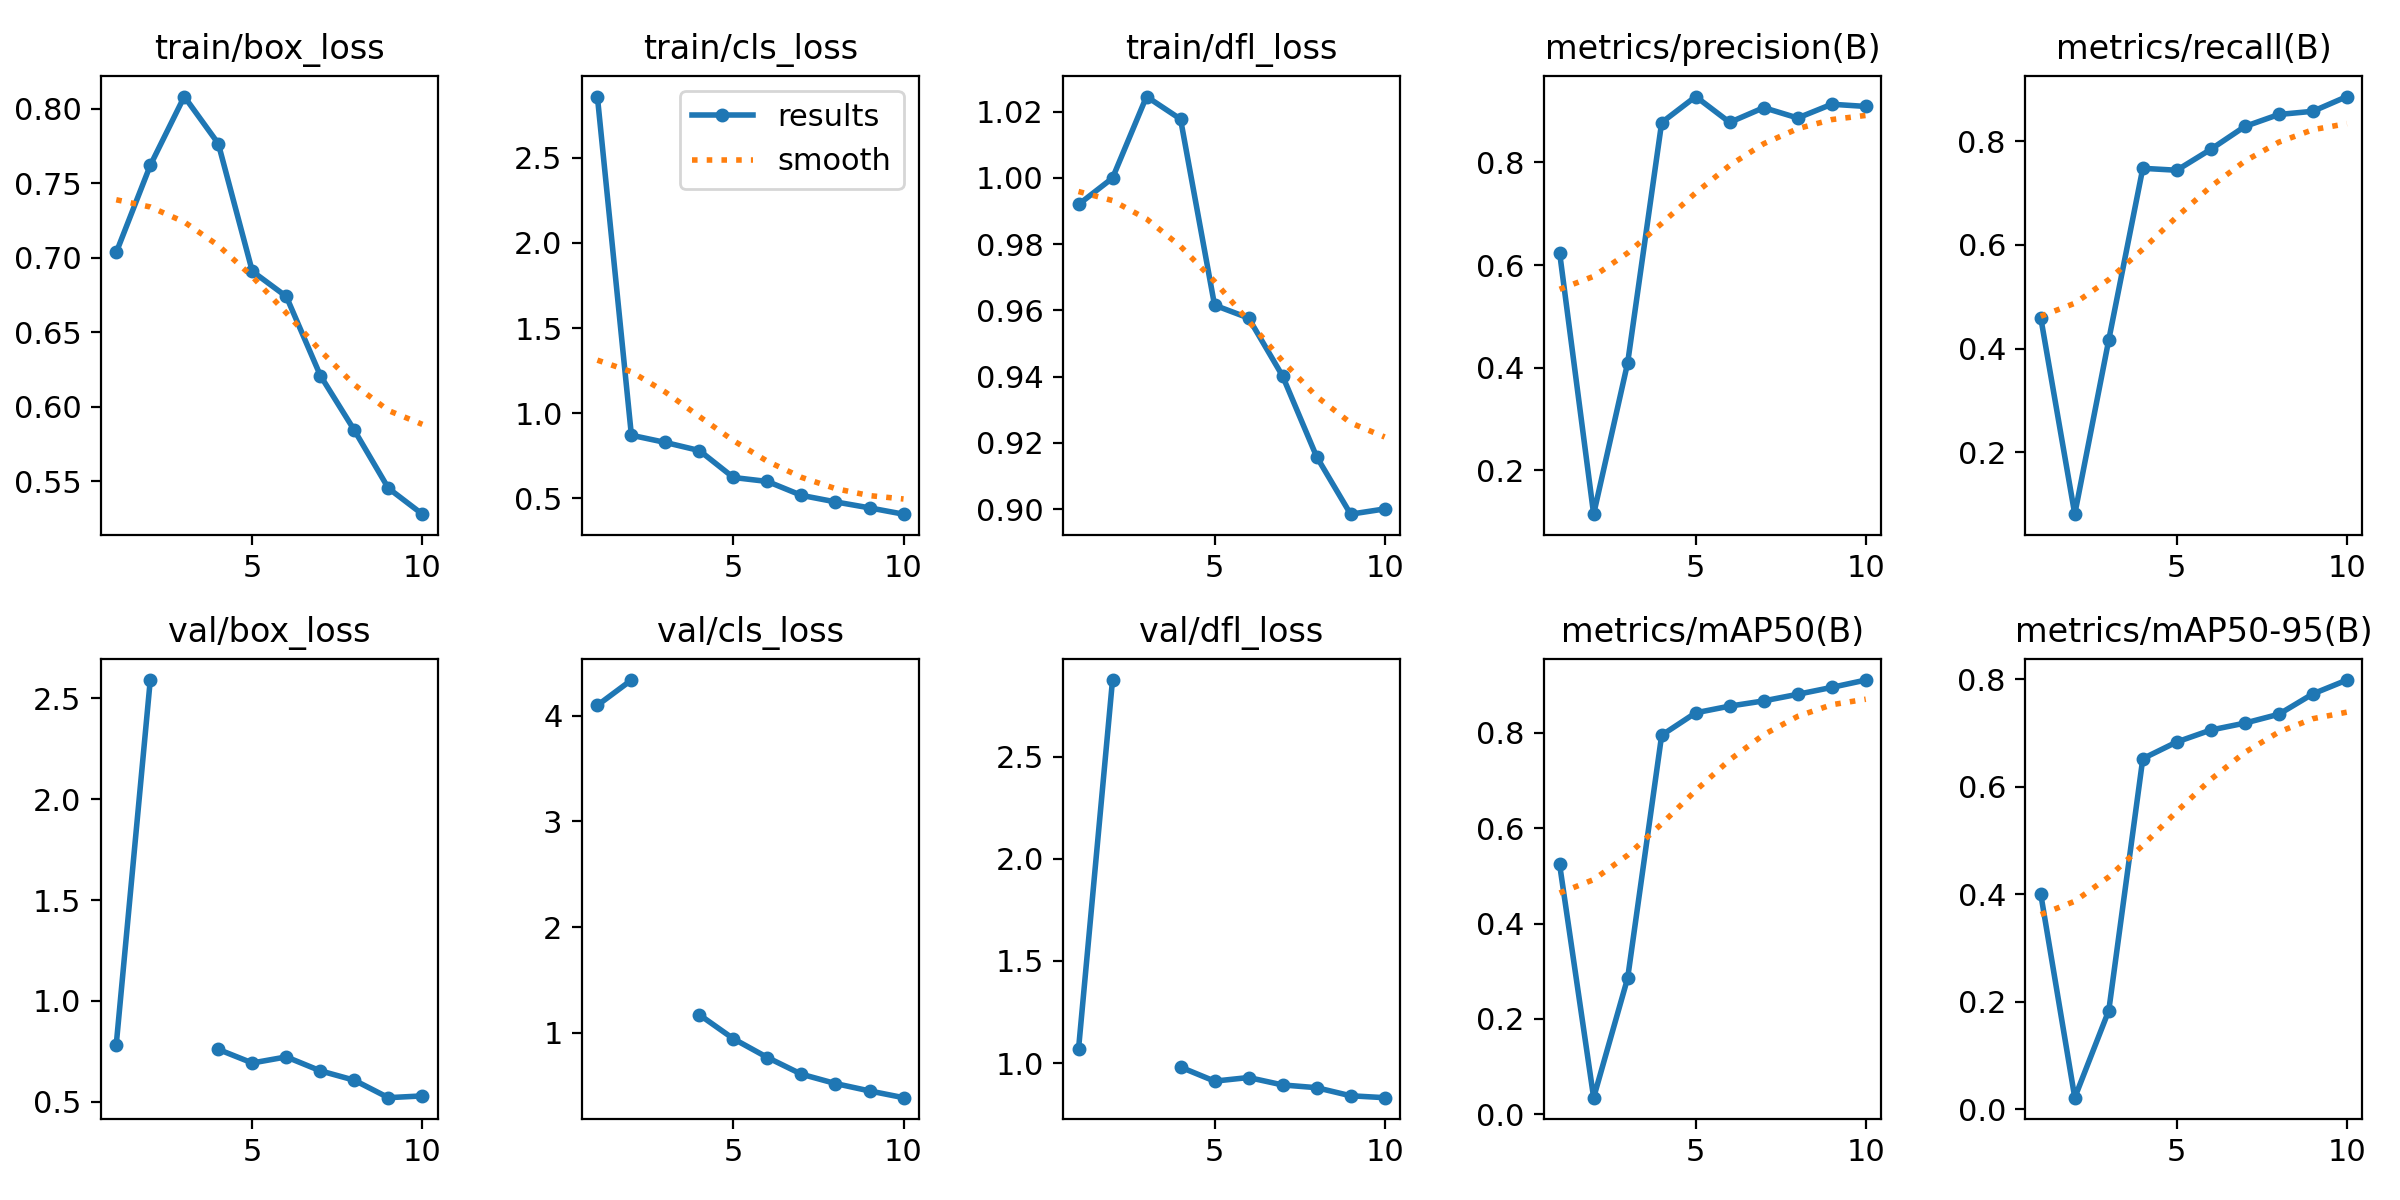

In [8]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/results.png', width=600)

# **Validate fine-tuned model**

In [9]:
!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics 8.3.36 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11s summary (fused): 238 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs
val: Scanning /content/tennis-balls-1/valid/labels.cache... 163 images, 0 backgrounds, 0 corrupt: 100% 163/163 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 11/11 [00:03<00:00,  2.98it/s]
                   all        163        211      0.909      0.891      0.911      0.799
Speed: 1.4ms preprocess, 10.5ms inference, 0.0ms loss, 4.0ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


Inference with custom model

# **Few Results**

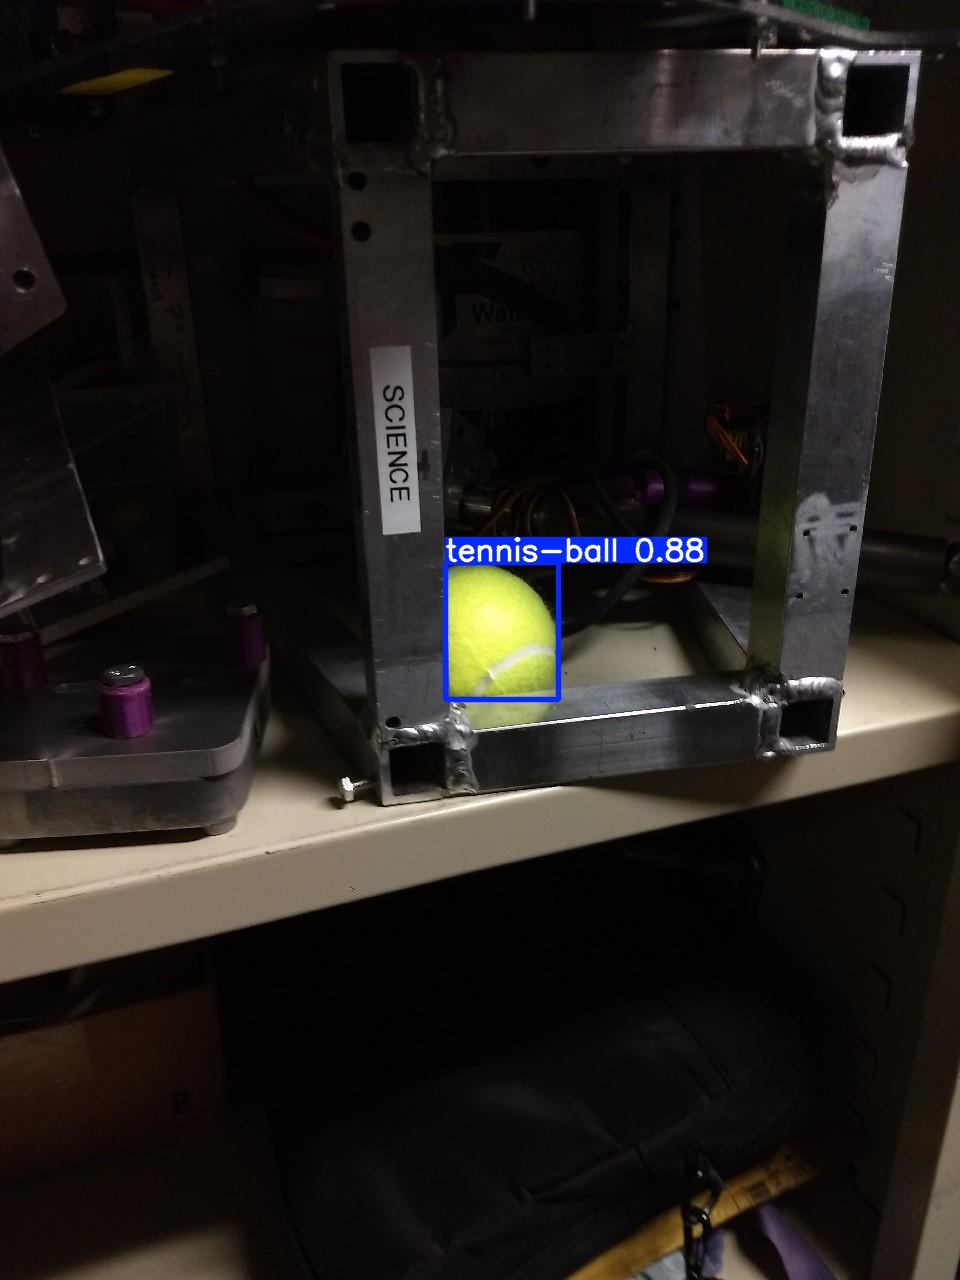

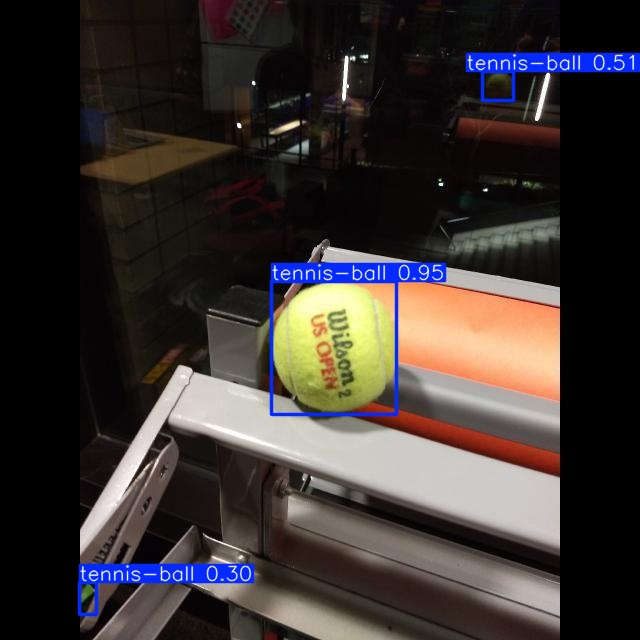

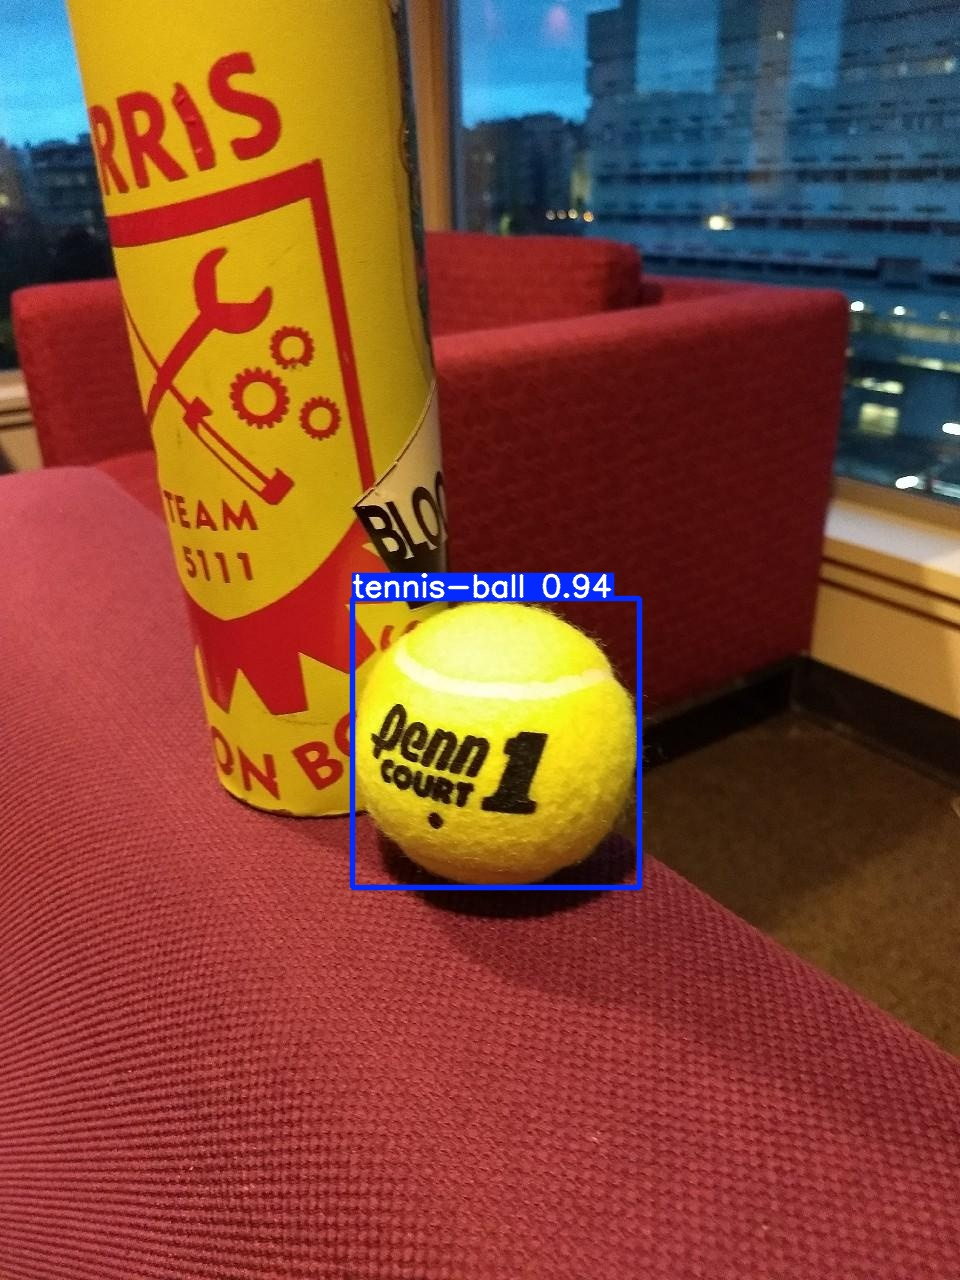

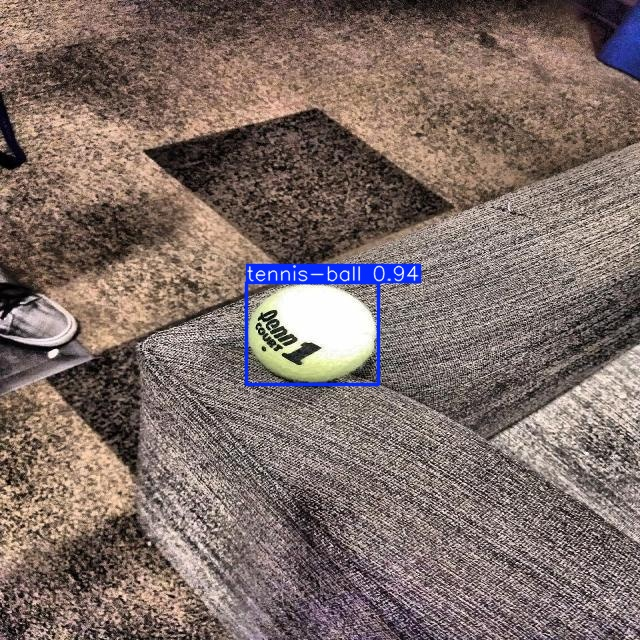

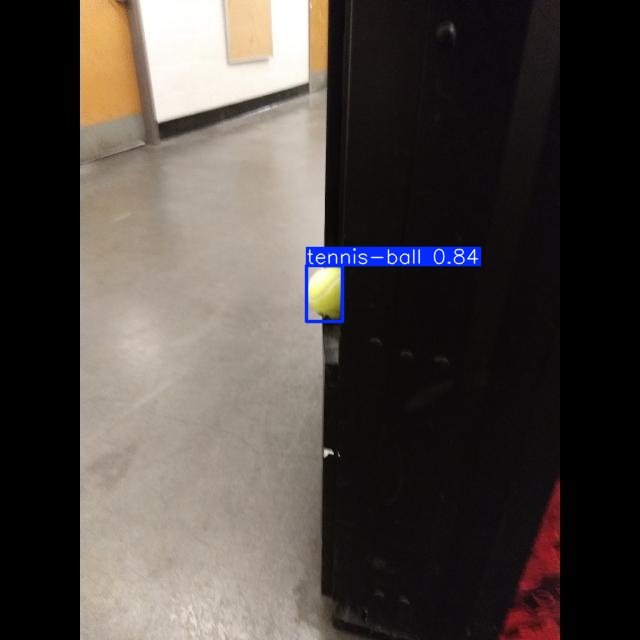

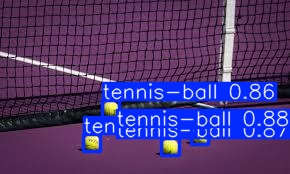

In [16]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/content/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[2:8]:
    display(IPyImage(filename=img, width=600))
    print("\n")